In [79]:
import os
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
import pandas as pd


'''
Note:  This code is just a hint for people who are not familiar with text processing in python. There is no obligation to use this code, though you may if you like. 
'''

def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

def read_data(file):
    '''
    Read each file into a list of strings. 
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on', 
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans('','', symbols)).strip(), lines) #python 2 to python 3
    words = list(filter(None, words))  #python 2 to python 3
    return words

###############################################
######## YOUR CODE STARTS FROM HERE. ##########
###############################################

def shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = "/Users/zhangben/Google Drive/NYU/Classes/1003MachineLearning/hw/hw3-svm/data/pos"
    neg_path = "/Users/zhangben/Google Drive/NYU/Classes/1003MachineLearning/hw/hw3-svm/data/neg"

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    random.shuffle(review)
    
    return review

'''
Now you have read all the files into list 'review' and it has been shuffled.
Save your shuffled result by pickle.
*Pickle is a useful module to serialize a python object structure. 
*Check it out. https://wiki.python.org/moin/UsingPickle
'''
 



"\nNow you have read all the files into list 'review' and it has been shuffled.\nSave your shuffled result by pickle.\n*Pickle is a useful module to serialize a python object structure. \n*Check it out. https://wiki.python.org/moin/UsingPickle\n"

In [80]:
review=shuffle_data()
pickle.dump(review, open( "review.p", "wb" ))

In [81]:
from sklearn.model_selection import train_test_split

review = pickle.load(open( "review.p", "rb" ))

review_X = list(i[:-1] for i in review)
review_Y = list(i[-1] for i in review)

X_train, X_test, y_train, y_test = train_test_split(review_X, review_Y, train_size=0.75, random_state=42)



/Users/zhangben/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 5

In [12]:
from collections import Counter
def counter(bag):
    cnt = Counter()
    for word in bag:
        cnt[word] += 1
    return cnt

## 6.4

In [13]:
X_train = list(counter(X_train[i]) for i in range(len(X_train)))  
X_test = list(counter(X_test[i]) for i in range(len(X_test)))

In [14]:
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale

In [171]:
def Pegasos(X,y,Lambda,epoch):
    w = {}
    t = 0
    l = len(X)   
    for _ in range(epoch):
        for i in range(l):
            t += 1
            s = 1/(t*Lambda)
            for f, v in w.items():
                
                w[f] = v * (1-s*Lambda)
            if y[i]*dotProduct(w,X[i]) <1:
                for f, v in X[i].items():
                    w[f] = w.get(f, 0) + v * s*y[i]              
                
    return w

## 6.5

In [55]:
def Pegasos_m(X,y,Lambda,epoch):
    W = {}
    w = {}
    t = 1
    s = 1
    l = len(X)    
    for _ in range(epoch):
        for i in range(l):
            t += 1
            eta = 1/(t*Lambda)
            s = (1-eta*Lambda)*s
            if s*y[i]*dotProduct(W,X[i]) <1:
                for f, v in X[i].items():
                    W[f] = W.get(f, 0) + v * 1/s*eta*y[i] 
        for f, v in W.items():
            w[f] = v * s
                
    return w

## 6.6

In [172]:
import timeit
print(timeit.timeit("Pegasos(X_train,y_train,0.01,5)", 
                     setup = "from __main__ import Pegasos,X_train,y_train", number=1))

49.96064996905625


In [173]:
import timeit
print(timeit.timeit("Pegasos_m(X_train,y_train,0.01,5)", 
                     setup = "from __main__ import Pegasos_m,X_train,y_train", number=1))

1.2036136691458523


## 6.7

In [246]:
def Pegasos_Loss(X,y,w):
    l = len(X)
    x = list(counter(X[i]) for i in range(l))
    loss_sum = 0
    for i in range(l):
        if np.sign(dotProduct(w,X[i])) != y[i]:
            loss_sum += 1            
    loss = loss_sum/l
                
    return loss

In [191]:
loss = Pegasos_Loss(X_train,y_train,w)
loss

0.068

In [68]:
def Pegasos_m_Loss(X,y,w):
    l = len(X)
    x = list(counter(X[i]) for i in range(l))
    loss_sum = 0
    for i in range(l):
        if np.sign(dotProduct(w,X[i])) != y[i]:
            loss_sum += 1            
    loss = loss_sum/l
                
    return loss

In [192]:
loss_m = Pegasos_m_Loss(X_train,y_train,w)
loss_m

0.068

In [ ]:
#      for i in range(l):
#             loss_sum = 0
#             loss_sum += max(0, 1-y[i]*dotProduct(w,x[i]))
#         losshist.append(Lambda/2*dotProduct(w,w)+1/l*loss_sum)

## 6.8

In [72]:
def Pegasos_lambda(X,y,Lambda,epoch):
    W = {}
    w = {}
    t = 1
    s = 1
    l = len(X)
    losshist=[]
    losshist.append(float("inf"))

    for e in range(epoch):
        for i in range(l):
            t += 1
            eta = 1/(t*Lambda)
            s = (1-eta*Lambda)*s
            if s*y[i]*dotProduct(W,X[i]) <1:
                for f, v in X[i].items():
                    W[f] = W.get(f, 0) + v * 1/s*eta*y[i] 
        for f, v in W.items():
            w[f] = v * s
         
        loss_sum = 0
        for i in range(l):
            loss_sum += max(0, 1-y[i]*dotProduct(w,X[i]))
        losshist.append(Lambda/2*dotProduct(w,w)+1/l*loss_sum)
 
        if (np.absolute(losshist[e]-losshist[e+1]))<1e-10:
            break   
                
    return w

In [267]:
lambda_grid = np.unique(10.**np.arange(-5,3,2))
losshist = []
for l in lambda_grid:
    w = Pegasos_lambda(X_train,y_train,l,1000)
    losshist.append(Pegasos_m_Loss(X_test, y_test, w))
    





[  1.00000000e-05   1.00000000e-03   1.00000000e-01   1.00000000e+01] [0.202, 0.186, 0.196, 0.296]


No handles with labels found to put in legend.


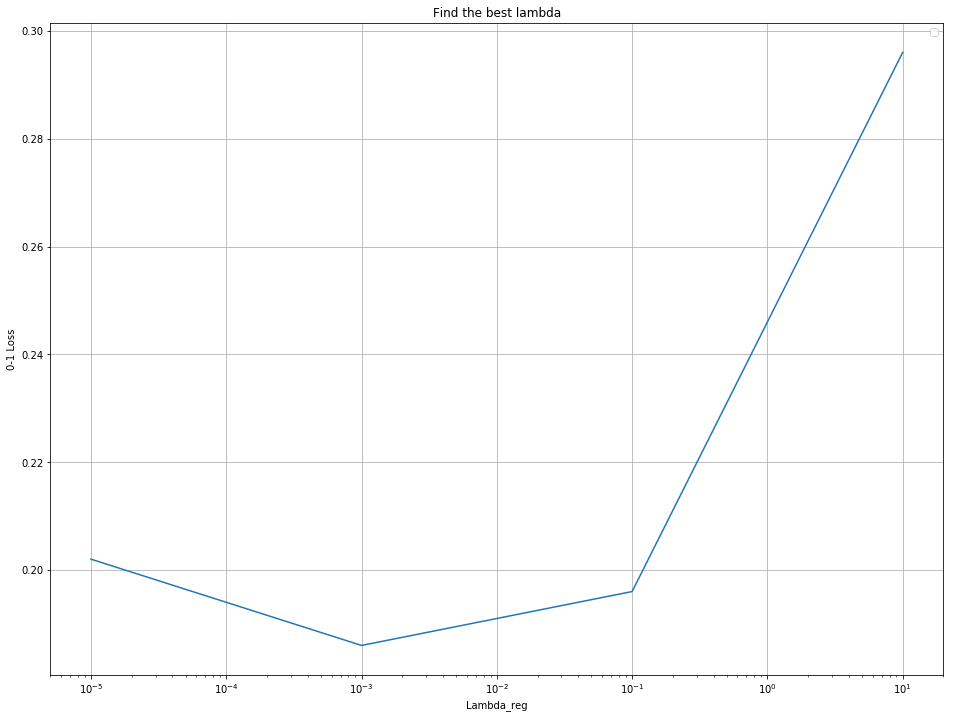

In [268]:
fig, ax = plt.subplots(figsize = (16, 12))
ax.semilogx(lambda_grid, losshist)   
ax.set_xlabel("Lambda_reg")
ax.set_ylabel("0-1 Loss")
ax.set_title("Find the best lambda")
legend = ax.legend(loc='best')
legend.FontSize = 8
plt.grid(True)
plt.show() 



#         loss_sum = 0
#         for i in range(l):
#             if np.sign(dotProduct(w,X[i])) != y[i]:
#                 loss_sum += 1            
#         losshist.append(loss_sum/l)

In [271]:
lambda_grid = np.unique(10.**np.arange(-4,0,0.5))
losshist = []
for l in lambda_grid:
    w = Pegasos_lambda(X_train,y_train,l,1000)
    losshist.append(Pegasos_m_Loss(X_test, y_test, w))
    
print(lambda_grid, losshist)

[  1.00000000e-04   3.16227766e-04   1.00000000e-03   3.16227766e-03
   1.00000000e-02   3.16227766e-02   1.00000000e-01   3.16227766e-01] [0.192, 0.188, 0.186, 0.188, 0.19, 0.19, 0.196, 0.206]


No handles with labels found to put in legend.


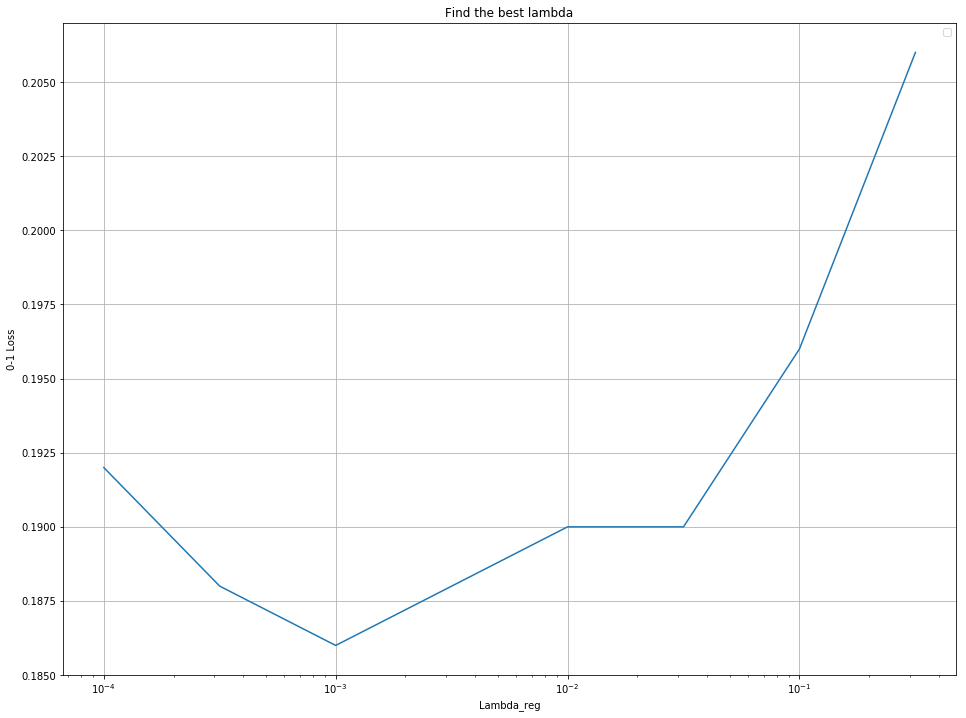

In [272]:
fig, ax = plt.subplots(figsize = (16, 12))
ax.semilogx(lambda_grid, losshist)   
ax.set_xlabel("Lambda_reg")
ax.set_ylabel("0-1 Loss")
ax.set_title("Find the best lambda")
legend = ax.legend(loc='best')
legend.FontSize = 8
plt.grid(True)
plt.show() 



#         loss_sum = 0
#         for i in range(l):
#             if np.sign(dotProduct(w,X[i])) != y[i]:
#                 loss_sum += 1            
#         losshist.append(loss_sum/l)

## 6.9

In [56]:
w=Pegasos_lambda(X_train,y_train,0.001,1000)

NameError: name 'Pegasos_lambda' is not defined

In [25]:
import collections

In [77]:
def confidence(X,y,w, number):
    df=pd.DataFrame()
    scores = []
    l=len(X)
    for i in range(l):
        scores.append(np.absolute(dotProduct(w,X[i])))
        
    df["Score Magnitude"] = scores
    df["Test Example"] = X
    df["Y"] = y
    
    df_sorted = df.sort_values(by='Score Magnitude',ascending = False)
    scores_sum = []
    accuracy = []
    s = l//number
    for p in range(0, l, s):
        scores_sum.append(sum(df_sorted["Score Magnitude"].iloc[p:p+s]))
        testx = df_sorted["Test Example"].iloc[p:p+s]
        testy = df_sorted["Y"].iloc[p:p+s]
        accuracy.append(Pegasos_m_Loss(testx.values,testy.values,w))
    return scores_sum, accuracy

No handles with labels found to put in legend.


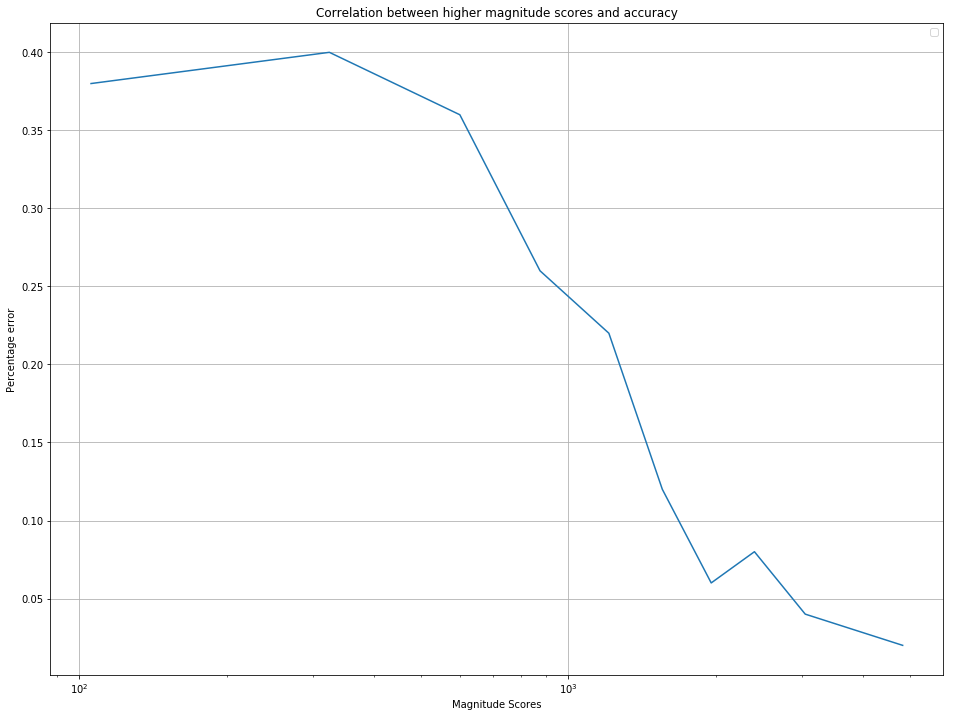

In [81]:
score, accuracy = confidence(X_test,y_test,w, 10)
fig, ax = plt.subplots(figsize = (16, 12))
ax.semilogx(score, accuracy)   
ax.set_xlabel("Magnitude Scores")
ax.set_ylabel("Percentage error")
ax.set_title("Correlation between higher magnitude scores and accuracy")
legend = ax.legend(loc='best')
legend.FontSize = 8
plt.grid(True)
plt.show() 

## 6.10

In [44]:
def Pegasos_count1(X,y,Lambda,epoch):
    W = {}
    w = {}
    t = 1
    s = 1
    l = len(X)  
    count = 0
    for _ in range(epoch):
        for i in range(l):
            t += 1
            eta = 1/(t*Lambda)
            s = (1-eta*Lambda)*s
            cond = s*y[i]*dotProduct(W,X[i])            
            if cond <1:
                for f, v in X[i].items():
                    W[f] = W.get(f, 0) + v * 1/s*eta*y[i] 
            elif cond<= 1 +1e-2 and cond>=1 - 1e-2:
                count +=1 
        for f, v in W.items():
            w[f] = v * s
                
    return count

In [45]:
count1  = Pegasos_count1(X_train,y_train,0.001,50)
count1

1

Let Lambda_reg = 0.001(best Lambda_reg I found above), I runned 50 epochs of train dataset, I get 1 time when  0.999<=$y_iW^Tx_i$ <=1.001. So it it not very often when $y_iW^Tx_i$ = 1 or close to 1.

In [57]:
w = Pegasos_m(X_train,y_train,0.001,50)

In [59]:
loss_original = Pegasos_m_Loss(X_test,y_test,w)

In [60]:
loss_original

0.204

In [63]:
def Pegasos_skip(X,y,Lambda,epoch):
    W = {}
    w = {}
    t = 1
    s = 1
    l = len(X)  

    for _ in range(epoch):
        for i in range(l):
            t += 1
            eta = 1/(t*Lambda)
            s_backup = s
            s = (1-eta*Lambda)*s
            cond = s*y[i]*dotProduct(W,X[i])  
            
            if cond<= 1 +1e-2 and cond>=1 - 1e-2:
                s = s_backup        
            elif cond <1 +1e-2:
                for f, v in X[i].items():
                    W[f] = W.get(f, 0) + v * 1/s*eta*y[i] 

        for f, v in W.items():
            w[f] = v * s
                
    return w

In [64]:
w_skip  = Pegasos_skip(X_train,y_train,0.001,50)


In [65]:
loss_skip = Pegasos_m_Loss(X_test,y_test,w_skip)
loss_skip

0.192

In [67]:
def Pegasos_narrowstep(X,y,Lambda,epoch):
    W = {}
    w = {}
    t = 1
    s = 1
    l = len(X)  

    for _ in range(epoch):
        for i in range(l):
            t += 1
            eta = 1/(t*Lambda)
            s_backup = s
            s = (1-eta*Lambda)*s
            cond = s*y[i]*dotProduct(W,X[i]) 
            
            if cond<= 1 +1e-2 and cond>=1 - 1e-2:
                s = (1-eta*0.8*Lambda)*s_backup        
            elif cond <1 +1e-2:
                for f, v in X[i].items():
                    W[f] = W.get(f, 0) + v * 1/s*eta*y[i] 

        for f, v in W.items():
            w[f] = v * s
                
    return w

In [68]:
w_narrowstep  = Pegasos_narrowstep(X_train,y_train,0.001,50)

In [69]:
loss_narrowstep = Pegasos_m_Loss(X_test,y_test,w_narrowstep)
loss_narrowstep

0.19

## 7

In [73]:
w=Pegasos_lambda(X_train,y_train,0.001,50)

In [74]:
l = len(X_test)
incorrect = []
index = []
for i in range(l):
    if np.sign(dotProduct(w,X_test[i])) != y_test[i]:
        incorrect.append(X_test[i])
        index.append(i)
        if len(incorrect) >3:
            break
print(incorrect, list(y_test[i] for i in index))

[Counter({'the': 25, 'of': 18, 'a': 16, 'to': 14, 'and': 10, 'in': 10, 'that': 10, 'as': 8, 'we': 7, 'is': 7, 'with': 6, 'but': 6, 'his': 6, 'this': 5, 'it': 5, 'he': 5, 'moresco': 4, 'one': 4, 'more': 4, 'or': 4, 'over': 4, 'get': 4, 'us': 4, 'first': 3, 'feature': 3, 'film': 3, '?': 3, 'movies': 3, 'do': 3, 'might': 3, 'have': 3, 'kids': 3, 'an': 3, 'slow': 3, 'up': 3, 'guy': 3, 'for': 3, 'head': 3, 'like': 3, 'blah': 3, 'lot': 3, 'making': 2, 'your': 2, 'if': 2, 'not': 2, 'cast': 2, 'plot': 2, 'dialogue': 2, 'such': 2, 'chance': 2, 'at': 2, 'need': 2, 'about': 2, 'neighborhood': 2, 'from': 2, 'kitchen': 2, 'make': 2, 'some': 2, 'motion': 2, 'scene': 2, 'be': 2, 'out': 2, 'who': 2, 'local': 2, 'assante': 2, 'gets': 2, 'seem': 2, 'little': 2, "baldwin's": 2, 'into': 2, 'most': 2, 'ever': 2, 'funny': 2, 'really': 2, 'so': 2, 'guys': 2, 'they': 2, 'actually': 2, 'tough': 2, 'just': 2, 'personal': 2, "ain't": 1, 'easy': 1, 'assemble': 1, 'decent': 1, 'strong': 1, 'writerdirector': 1, 'ro

In [14]:
w

{'so': -1.1066519113078408,
 'what': 1.133318222423696,
 'do': -1.86664177810962,
 'you': 1.1466513779816152,
 'get': -0.5066599112011831,
 'when': -0.23999680004267593,
 'mix': -0.42666097785362683,
 'together': 1.386648178024284,
 'plot': -2.639964800469314,
 'elements': 0.18666417781096048,
 'from': 0.7199904001279935,
 'various': 0.17333102225303523,
 'successful': -0.5866588445487392,
 'scifi': 0.31999573339021936,
 'films': 0.5733256889908065,
 'such': -0.8399888001493271,
 'as': 0.9466540446127372,
 'close': 0.3999946667377758,
 'encounters': -0.13333155557925752,
 'of': -0.5199930667591142,
 'the': 0.27999626671643846,
 'third': 0.3333288889481472,
 'kind': 0.33332888894814816,
 '2001': 0.06666577778962998,
 'a': -0.02666631111584881,
 'space': -0.7599898668017733,
 'odyssey': 0.09333208890548099,
 'apollo': 6.5634325853601205e-16,
 '13': 0.14666471113718452,
 'and': 1.3066492446767306,
 'contact': 0.5333262223170345,
 '?': 0.23999680004267404,
 'well': 1.3066492446767322,
 'wh

In [75]:
def ErrorAnalysis(example,w):
    d_feature = []
    d_abwixi=[]
    d_xi=[]
    d_wi=[]
    d_xiwi=[]
    df = pd.DataFrame()
    for f, v in example.items():
        d_feature.append(f)
        d_abwixi.append(np.absolute(w.get(f, 0)* v))
        d_xi.append(v)
        d_wi.append(w.get(f, 0))        
        d_xiwi.append((w.get(f, 0)* v))
    df["Feature of Example"] = d_feature
    df["|WiXi| of Example"] = d_abwixi
    df["Xi of Example"] = d_xi
    df["Wi of Example"] = d_wi
    df["WiXi of Example"] = d_xiwi
    
    return df

In [78]:
for e in incorrect:
    df = ErrorAnalysis(e,w).sort_values(by='|WiXi| of Example', ascending=False)
df

,Feature of Example,|WiXi| of Example,Xi of Example,Wi of Example,WiXi of Example
7,and,7.279903e+00,7,1.039986e+00,7.279903e+00
4,of,3.999947e+00,6,-6.666578e-01,-3.999947e+00
33,the,3.399955e+00,15,2.266636e-01,3.399955e+00
18,will,3.093292e+00,2,1.546646e+00,3.093292e+00
103,worst,2.839962e+00,1,-2.839962e+00,-2.839962e+00
101,was,2.519966e+00,3,8.399888e-01,2.519966e+00
153,well,2.333302e+00,1,2.333302e+00,2.333302e+00
108,only,2.266636e+00,1,-2.266636e+00,-2.266636e+00
65,plot,2.239970e+00,1,-2.239970e+00,-2.239970e+00
85,when,2.239970e+00,3,-7.466567e-01,-2.239970e+00


words like "and", "of" takes too much weight. the majority predict value of sentimental words are equals zero, affecting the right prediction.

remove some words like "and""the""of". increase the value of sentiments words in w by adding sentiments text????

In [ ]:
review=shuffle_data()
pickle.dump(review, open( "review.p", "wb" ))

from sklearn.model_selection import train_test_split

review = pickle.load(open( "review.p", "rb" ))
review_X = list(i[:-1] for i in review)
review_Y = list(i[-1] for i in review)
X_train, X_test, y_train, y_test = train_test_split(review_X, review_Y, train_size=0.75, random_state=42)

def ngrams(input, n):
  output = []
  for i in range(len(input)-n+1):
    output.append(input[i:i+n])
  return output

from collections import Counter
def counter(bag):
    cnt = Counter()
    for word in bag:
        cnt[word] += 1
    return cnt

X_train = ngrams(X_train,2) 
X_test = ngrams(X_test,2)

X_train = list(counter(X_train[i]) for i in range(len(X_train)))  
X_test = list(counter(X_test[i]) for i in range(len(X_test)))

w = Pegasos(X_train,y_train,0.001,50)
Loss_ngrams = Pegasos_m_Loss(X_test,y_test,w)


In [ ]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

review=shuffle_data()
pickle.dump(review, open( "review.p", "wb" ))

from sklearn.model_selection import train_test_split

review = pickle.load(open( "review.p", "rb" ))
review_X = list(i[:-1] for i in review)
review_Y = list(i[-1] for i in review)
X_train, X_test, y_train, y_test = train_test_split(review_X, review_Y, train_size=0.75, random_state=42)

def ngrams(input, n):
  output = []
  for i in range(len(input)-n+1):
    output.append(input[i:i+n])
  return output

from collections import Counter
def counter(bag):
    cnt = Counter()
    for word in bag:
        cnt[word] += 1
    return cnt

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]
def tfidf(X):
    stop_words = stopwords.words('english') + list(punctuation)
    vocabulary = set()
    for i in X:
        words = tokenize(X[i])
        vocabulary.update(words)

    vocabulary = list(vocabulary)
    word_index = {w: idx for idx, w in enumerate(vocabulary)}

    VOCABULARY_SIZE = len(vocabulary)
    DOCUMENTS_COUNT = len(X)

    word_idf = defaultdict(lambda: 0)
    for i in X:
        words = set(tokenize(X[i]))
        for word in words:
            word_idf[word] += 1

    for word in vocabulary:
        word_idf[word] = math.log(DOCUMENTS_COUNT / float(1 + word_idf[word]))
 
    return [word_tf[word] * word_idf[word] word for i in len(X)]

X_train = ngrams(X_train,2) 
X_test = ngrams(X_test,2)

X_train = list(counter(X_train[i]) for i in range(len(X_train)))  
X_test = list(counter(X_test[i]) for i in range(len(X_test)))

X_train = list(tfidf(X_train[i]) for i in range(len(X_train)))  
X_test = list(tfidf(X_test[i]) for i in range(len(X_test)))

w = Pegasos(X_train,y_train,0.001,50)
Multiple_features = Pegasos_m_Loss(X_test,y_test,w)
